# Exercise2.1-练习李老师课间内容
- 本节主要目的：在对数据分析、处理前，要粗略浏览、挑选有效事件，排除干扰事件；
- 本节以PPAC数据为例（每个ppac信号有：x1，x2，y1，y2，anode）讲述挑选事件的大致流程；
 - 通过查看各个信号的时间谱挑出各个信号的有效成分，剔除偶然符合事件（限定左右边界、TCut）；
 - 同过两关联事件参量（x1与x2，y1与y2），剔除堆积事件（$mean \pm 3\sigma $）；

## 打开.root文件

In [1]:
TFile * ipf = new TFile("../f8ppac001.root","READ");//root -l *.root
ipf->ls();//ROOT环境下的.ls

TFile**		../f8ppac001.root	
 TFile*		../f8ppac001.root	
  KEY: TTree	tree;3	tree
  KEY: TTree	tree;2	tree


## 观察tree结构

In [2]:
tree->Print();

******************************************************************************
*Tree    :tree      : tree                                                   *
*Entries :   739685 : Total =       160003397 bytes  File  Size =   64110481 *
*        :          : Tree compression factor =   2.50                       *
******************************************************************************
*Br    0 :PPACF8    : PPACF8[5][5]/F                                         *
*Entries :   739685 : Total  Size=   74070284 bytes  File Size  =   39236859 *
*Baskets :     1091 : Basket Size=    8888320 bytes  Compression=   1.89     *
*............................................................................*
*Br    1 :F8PPACRawData : F8PPACRawData[5][5]/F                              *
*Entries :   739685 : Total  Size=   74077949 bytes  File Size  =   19787945 *
*Baskets :     1091 : Basket Size=    8890368 bytes  Compression=   3.74     *
*...................................................

## f8ppac001.root文件mapping

|Branch|PPAC|
|:-:|:-:|
|F8PPACRawata[0][0]|PPAC 1 Layer A $T_{x1}$|
|F8PPACRawata[0][1]|PPAC 1 Layer A $T_{x2}$|
|F8PPACRawata[0][2]|PPAC 1 Layer A $T_{y1}$|
|F8PPACRawata[0][3]|PPAC 1 Layer A $T_{y2}$|
|F8PPACRawata[0][4]|PPAC 1 Layer A $T_a$|
|F8PPACRawata[1][0-4]|PPAC 1 Layer B|
|F8PPACRawata[2][0-4]|PPAC 2 Layer A|
|F8PPACRawata[3][0-4]|PPAC 2 Layer B|
|F8PPACRawata[4][0-4]|PPAC 3|

## 观察指定事件数据

In [3]:
tree->Show(0);

======> EVENT:0
 PPACF8          = -5.01602, 
                  13.0286, -1750.7, -1742.1, 46.4446, -1000, 
                  -1000, -1713.3, -1721.9, -1000, -2.85523, 
                  7.50031, -1250.7, -1242.1, 59.4051, -2.62014, 
                  8.0505, -1213.3, -1221.9, 53.2379
 F8PPACRawData   = 933, 
                  857, 704, 590, 316, 4.5751e-41, 
                  4.54495e-31, 1.4013e-45, 2.76759e-31, 1.4013e-45, 4095, 
                  4095, 4095, 4095, 4095, 4.59163e-41, 
                  2.7666e-31, 1.4013e-45, 7.17465e-42, 0
 beamTrig        = 0
 must2Trig       = 0
 targetX         = 2.6841
 targetY         = -4.85034


In [4]:
tree->Show(1000);

======> EVENT:1000
 PPACF8          = -5.41086, 
                  13.64, -1750.7, -1742.1, 43.7072, -1000, 
                  -1000, -1713.3, -1721.9, -1000, -2.94192, 
                  8.76117, -1250.7, -1242.1, 57.4452, -2.41571, 
                  -1000, -1213.3, -1221.9, 49.6682
 F8PPACRawData   = 922, 
                  842, 687, 565, 297, 4.5751e-41, 
                  4.54495e-31, 1.4013e-45, 2.76759e-31, 1.4013e-45, 4095, 
                  4095, 4095, 4095, 4095, 4.59163e-41, 
                  2.7666e-31, 1.4013e-45, 7.17465e-42, 0
 beamTrig        = 0
 must2Trig       = 0
 targetX         = 3.85833
 targetY         = -3.35889


## 继承root文件中tree指针，以便查看、分析数据

- 查看数据，确定有效数据范围；

In [5]:
TTree * tree = (TTree*)ipf->Get("tree");
TCanvas * c1 = new TCanvas("c1","c1");

### 查看PPAC1-A x方向

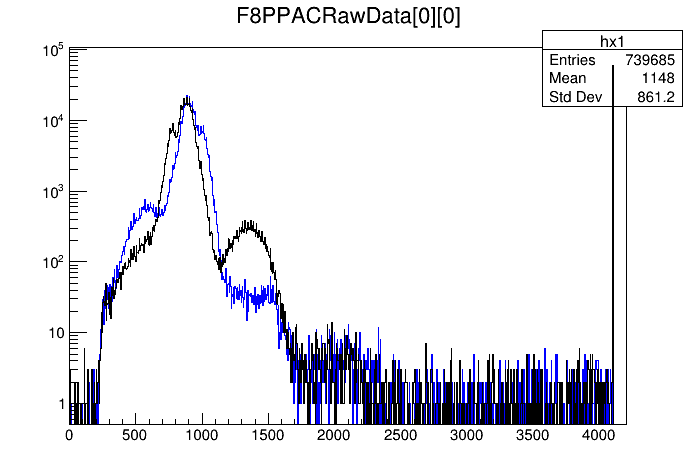

In [6]:
tree->Draw("F8PPACRawData[0][0]>>hx1(1000,0,4200)");//F8PPAC1A-Tx1
tree->Draw("F8PPACRawData[0][1]>>hx2(1000,0,4200)");//F8PPAC1A-Tx2
TH1D *hx1=(TH1D*)gROOT->FindObject("hx1");
TH1D *hx2=(TH1D*)gROOT->FindObject("hx2");
hx1->SetLineColor(kBlue);
hx2->SetLineColor(kBlack);
hx1->Draw();
hx2->Draw("same");
c1->SetLogy();
c1->Draw();

### 查看PPAC1-A x方向

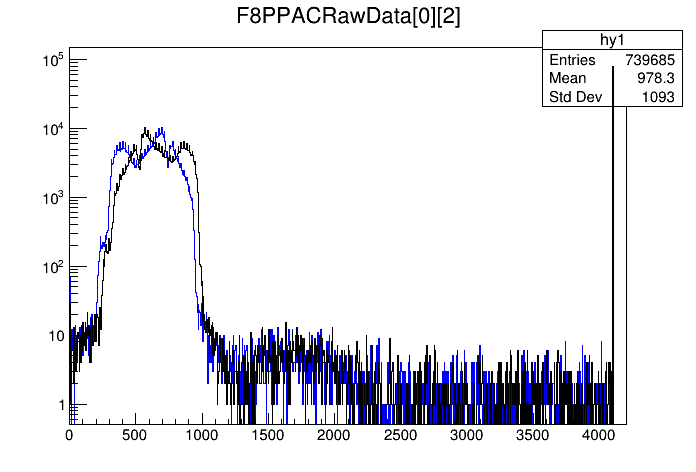

In [7]:
tree->Draw("F8PPACRawData[0][2]>>hy1(1000,0,4200)");//F8PPAC1A-Ty1
tree->Draw("F8PPACRawData[0][3]>>hy2(1000,0,4200)");//F8PPAC1A-Ty2
TH1D *hy1=(TH1D*)gROOT->FindObject("hy1");
TH1D *hy2=(TH1D*)gROOT->FindObject("hy2");
hy1->SetLineColor(kBlue);
hy2->SetLineColor(kBlack);
hy1->Draw();
hy2->Draw("same");
c1->SetLogy();
c1->Draw();

### 查看PPAC1-A anode

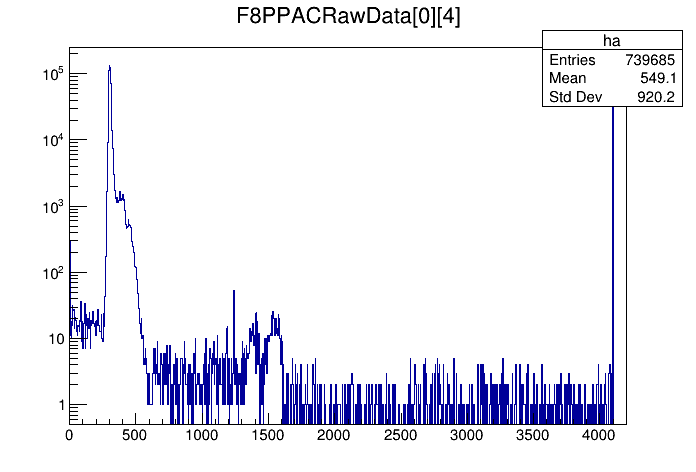

In [8]:
tree->Draw("F8PPACRawData[0][4]>>ha(1000,0,4200)");//F8PPAC1A-Ta
ha->Draw();
c1->Draw();

### 选取时间信号的范围
 - x1,x2:0-1700
 - y1,y2:0-1400
 - anode:200-600
 - 每个位置信号都需要有符合的阳极信号
 - 上述范围外的时间信号为偶然符合或异常信号

### 利用TCut挑出有效事件

In [9]:
  TCut ca="Ta>200 && Ta<600";
  TCut cx1="Tx1>0 && Tx1<1700" && ca;
  TCut cx2="Tx2>0 && Tx2<1700" && ca;
  TCut cy1="Ty1>0 && Ty1<1400" && ca;
  TCut cy2="Ty2>0 && Ty2<1400" && ca;

  TCut cppac=cx1 && cx2 && cy1 && cy2;

In [10]:
// F8PPAC
  tree->SetAlias("Tx1","F8PPACRawData[0][0]");//F8PPAC1A-txl
  tree->SetAlias("Tx2","F8PPACRawData[0][1]");//F8PPAC1A-txr
  tree->SetAlias("Ty1","F8PPACRawData[0][2]");//F8PPAC1A-tyu
  tree->SetAlias("Ty2","F8PPACRawData[0][3]");//F8PPAC1A-tyd
  tree->SetAlias("Ta","F8PPACRawData[0][4]");//F8PPAC1A-Anode

  tree->SetAlias("dtx1","Tx1-Ta");
  tree->SetAlias("dtx2","Tx2-Ta");
  tree->SetAlias("dty1","Ty1-Ta");
  tree->SetAlias("dty2","Ty2-Ta");

#### 查看PPAC1-A x方向有效信号

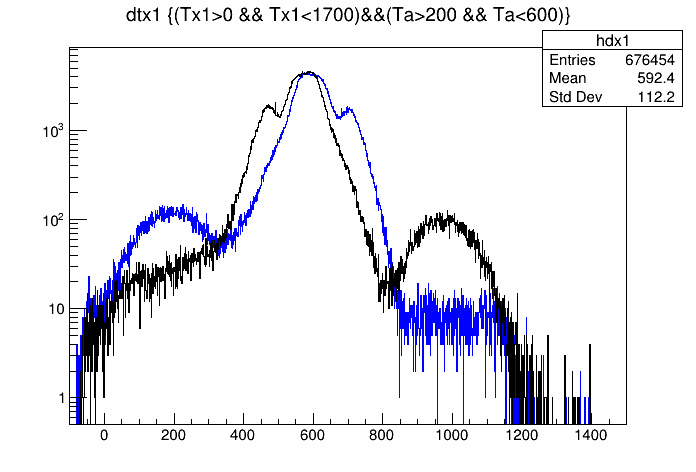

In [11]:
tree->Draw("dtx1>>hdx1(1600,-100,1500)",cx1);
tree->Draw("dtx2>>hdx2(1600,-100,1500)",cx2);
TH1D *hdx1=(TH1D*)gROOT->FindObject("hdx1");
TH1D *hdx2=(TH1D*)gROOT->FindObject("hdx2");
hdx1->SetLineColor(kBlue);
hdx2->SetLineColor(kBlack);
hdx1->Draw();
hdx2->Draw("same");
c1->SetLogy();
c1->Draw();
c1->Draw();

#### 查看PPAC1-A x方向有效信号的事件差

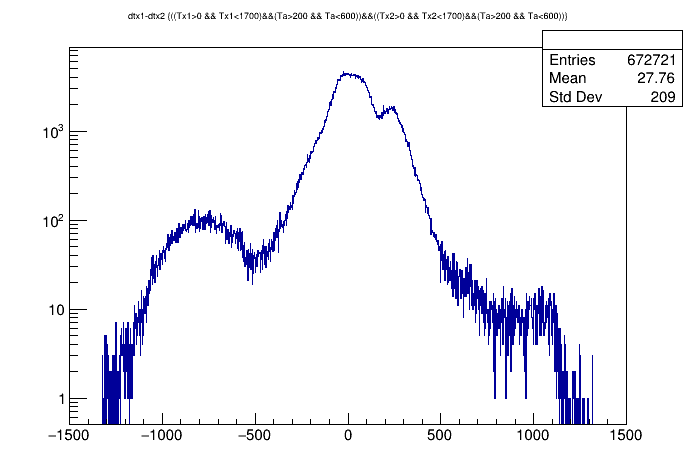

In [12]:
tree->Draw("dtx1-dtx2>>(1500,-1500,1500)",cx1 && cx2);
c1->SetLogy();
c1->Draw();

### 探测器两端信号关联
#### $T_{x1}$ (与束流速度有关)

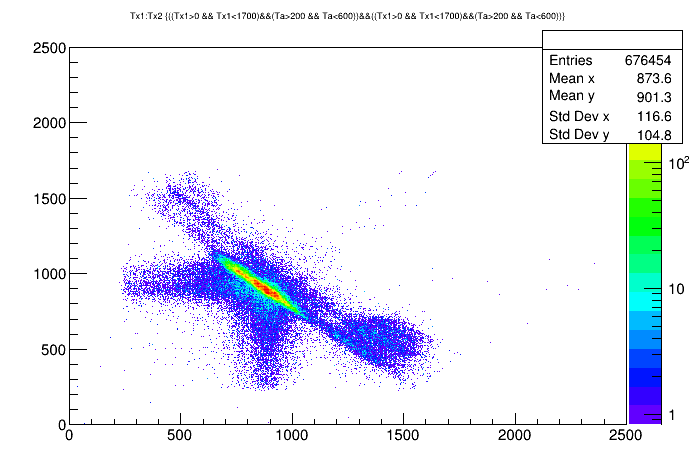

In [13]:
tree->Draw("Tx1:Tx2>>(1000,0,2500,1000,0,2500)",cx1 && cx1,"colz");
gStyle->SetPalette(1);
c1->SetLogy(0);
c1->SetLogz();
c1->Draw();

#### $dt_{x1}$ （与束流速度无关）

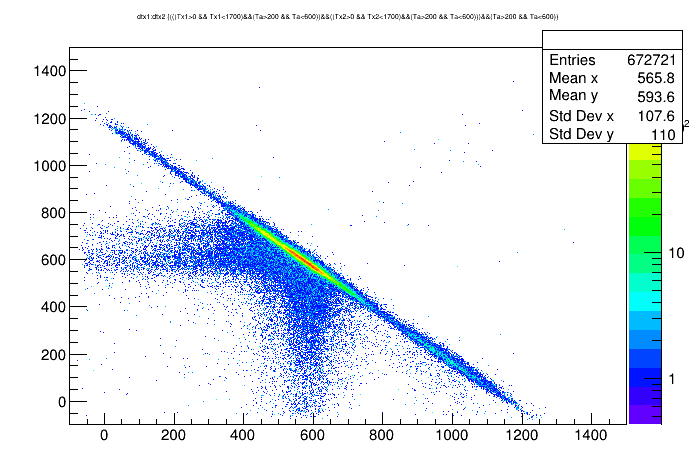

In [14]:
tree->Draw("dtx1:dtx2>>(1600,-100,1500,1600,-100,1500)",cx1 && cx2 && ca,"colz");
gStyle->SetPalette(1);
c1->SetLogz();
c1->Draw();

#### 堆积信号
在束流比较强的时候，需要考虑堆积(Pileup)事件的排除。堆积是由于同时有多个粒子打在PPAC上，造成delayline的x的两端的时间不是由同一个粒子给出的。换句话说，堆积信号的两端事件和不是常数。
- 提取x方向非堆积信号范围

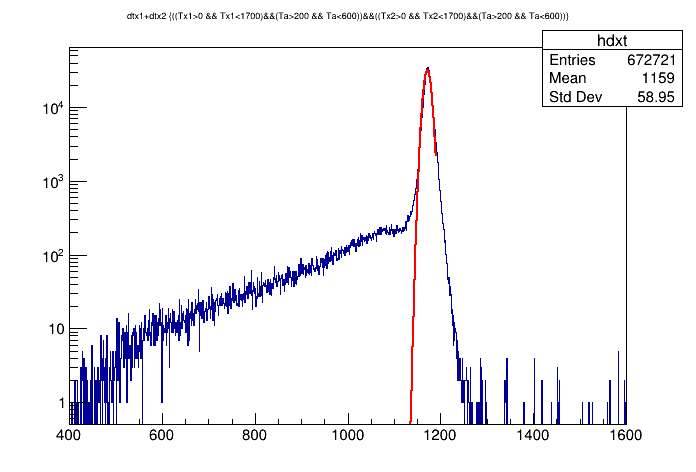

 FCN=15624.4 FROM MIGRAD    STATUS=CONVERGED      85 CALLS          86 TOTAL
                     EDM=1.23713e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.12561e+04   5.57675e+01   2.47378e+00   2.77446e-07
   2  Mean         1.17205e+03   1.02913e-02   6.25846e-04   9.58504e-04
   3  Sigma        7.66373e+00   1.00156e-02   1.83885e-05   1.37640e-01


In [15]:
tree->Draw("dtx1+dtx2>>hdxt(1200,400,1600)",cx1 && cx2);
hdxt->Fit("gaus","","",1130,1190);
gPad->SetLogy();
hdxt->Draw();
c1->Draw();

In [16]:
TF1 *fx=hdxt->GetFunction("gaus");
Double_t xpeak=fx->GetParameter(1);
Double_t xsigma=fx->GetParameter(2);
cout<<"range:"<<xpeak-3*xsigma<<"~"<<xpeak+3*xsigma<<endl;

range:1149.06~1195.04


- 提取y方向非堆积信号范围

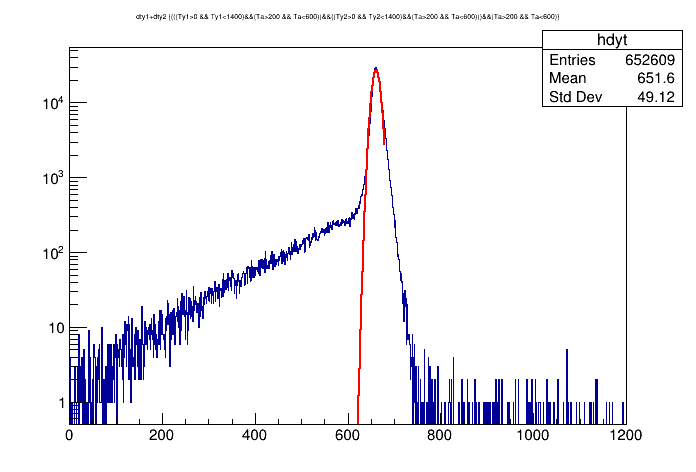

 FCN=22519.4 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=4.28407e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.70976e+04   4.89759e+01  -8.84731e-03  -1.22717e-07
   2  Mean         6.61676e+02   1.21685e-02   7.31839e-06   8.75846e-04
   3  Sigma        8.42012e+00   1.14851e-02  -1.19840e-07  -3.02985e-02


In [17]:
tree->Draw("dty1+dty2>>hdyt(1200,0,1200)",cy1 && cy2 && ca);
hdyt->Fit("gaus","","",600,680);
gPad->SetLogy();
hdyt->Draw();
c1->Draw();

In [18]:
TF1 *fy=hdyt->GetFunction("gaus");
Double_t ypeak=fy->GetParameter(1);
Double_t ysigma=fy->GetParameter(2);
cout<<"range:"<<ypeak-3*ysigma<<"~"<<ypeak+3*ysigma<<endl;

range:636.416~686.937


- x，y非堆积事件的另一种表示

In [19]:
TString spileup;
spileup.Form("abs(dtx1+dtx2-%f)<3*%f",xpeak,xsigma);
TCut cxpileup=spileup.Data();
spileup.Form("abs(dty1+dty2-%f)<3*%f",ypeak,ysigma);
TCut cypileup=spileup.Data();
TCut cpileup=cxpileup && cypileup;

 - 存在堆积事件

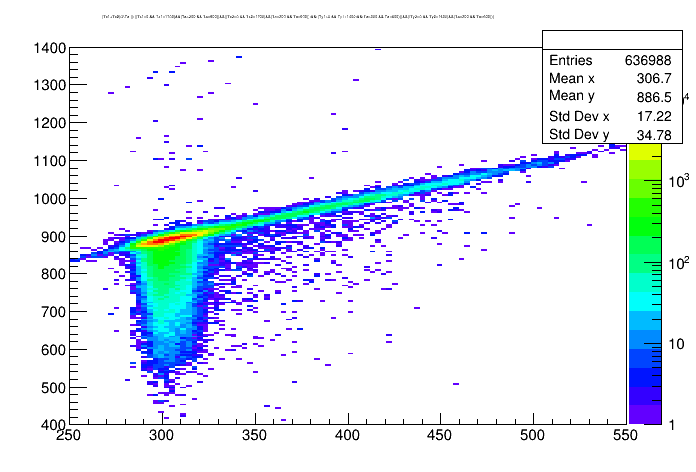

In [20]:
tree->Draw("(Tx1+Tx2)/2:Ta>>(100,250,550,200,400,1400)",cppac,"colz");
gPad->SetLogy(0);
gPad->SetLogz();
c1->Draw();

 -  排除堆积事件

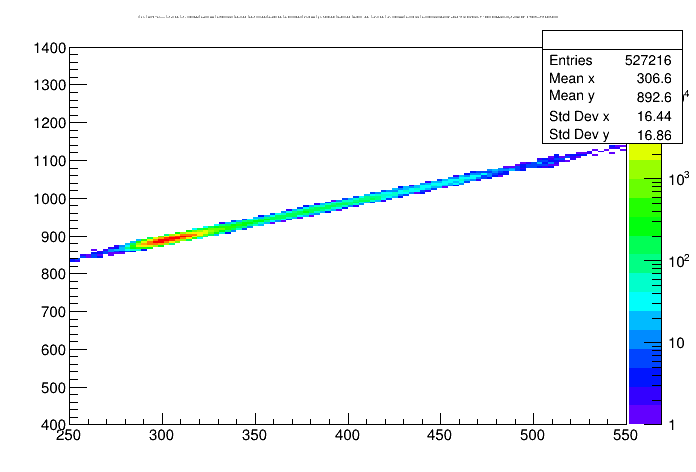

In [21]:
tree->Draw("(Tx1+Tx2)/2:Ta>>(100,250,550,200,400,1400)",cppac&&cpileup,"colz");
gPad->SetLogy(0);
gPad->SetLogz();
c1->Draw();

- PPAC1-A 位置谱

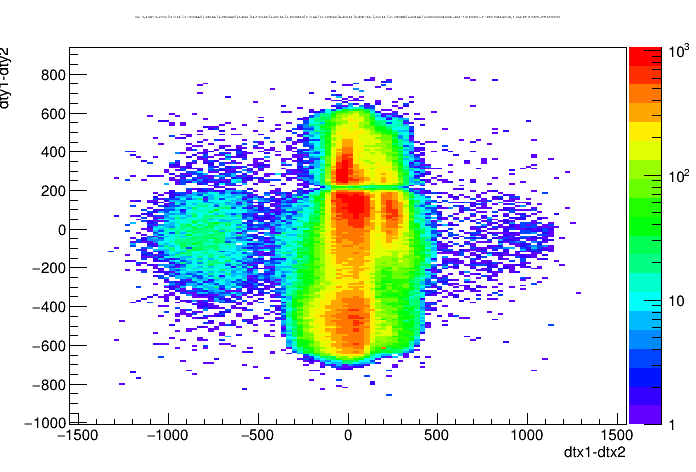

In [22]:
tree->Draw("dty1-dty2:dtx1-dtx2",cppac&&cpileup,"colz");
gPad->SetLogy(0);
c1->Draw();

In [23]:
!jupyter nbconvert exercise2.1 --to html

[NbConvertApp] Converting notebook exercise2.1.ipynb to html


